In [1]:
from typing import List, Tuple
import numpy as np
import matplotlib.pyplot as plt
import gensim
from gensim import corpora, models

/Users/dpmlto1/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [2]:
%matplotlib inline

In [3]:
def save_corpus(filename: str, vecs, dictname: gensim.corpora.dictionary.Dictionary) -> None:
    '''Save a corpus of vectors in Matrix Market format
    Parameters
        filename: full path to file to save
        vecs: corpus to save
        dictname: gensim dictionary with id, word pairs
    '''
    corpora.MmCorpus.serialize(filename, vecs, id2word=dictname)

In [4]:
# File String Constants
TERMDICTFILE = '../models/titleabstract.dict'
TERMTFIDFMODELFILE = '../models/titleabstract.tfidf_model'
TERMTFIDFFILE = '../models/titleabstract_tfidf.mm'
TERMLSIMODELFILE = '../models/titleabstract.lsi_model'
TERMLSIFILE = '../models/titleabstract_lsi.mm'

In [5]:
term_dict = corpora.Dictionary.load(TERMDICTFILE)

In [6]:
term_tfidf = corpora.MmCorpus(TERMTFIDFFILE)

In [7]:
lsi_model = models.LsiModel(term_tfidf, id2word=term_dict, num_topics=200)

In [8]:
lsi_model.save(TERMLSIMODELFILE)

In [9]:
term_lsi = lsi_model[term_tfidf]

In [10]:
save_corpus(TERMLSIFILE, term_lsi, term_dict)

In [11]:
V = gensim.matutils.corpus2dense(term_lsi, len(lsi_model.projection.s)).T / lsi_model.projection.s

In [12]:
V

array([[  2.72851153e-03,   2.03328100e-04,   3.15455023e-03, ...,
         -3.49938994e-03,   2.80776454e-03,  -5.27269447e-06],
       [  3.52258572e-03,  -3.47573068e-03,   7.01807834e-03, ...,
          4.25525672e-03,  -5.52874735e-03,   3.87331683e-03],
       [  4.49728808e-03,  -8.68520479e-03,   9.86235066e-04, ...,
          4.47998994e-03,   4.64590528e-03,   2.86301889e-04],
       ..., 
       [  2.96197546e-03,  -2.19180664e-03,   1.95195178e-03, ...,
         -9.09499052e-05,  -1.90450329e-03,  -3.74261542e-03],
       [  1.01092678e-02,  -2.11808344e-02,  -5.44329422e-03, ...,
         -4.26896441e-03,  -4.35897860e-03,  -8.65376836e-03],
       [  8.54987595e-03,  -4.25424742e-03,   8.92882381e-03, ...,
          2.61599722e-03,   3.81199950e-03,  -8.26316744e-04]])

In [13]:
np.shape(V)

(28808, 200)

In [14]:
VT = V.T

In [15]:
VT

array([[  2.72851153e-03,   3.52258572e-03,   4.49728808e-03, ...,
          2.96197546e-03,   1.01092678e-02,   8.54987595e-03],
       [  2.03328100e-04,  -3.47573068e-03,  -8.68520479e-03, ...,
         -2.19180664e-03,  -2.11808344e-02,  -4.25424742e-03],
       [  3.15455023e-03,   7.01807834e-03,   9.86235066e-04, ...,
          1.95195178e-03,  -5.44329422e-03,   8.92882381e-03],
       ..., 
       [ -3.49938994e-03,   4.25525672e-03,   4.47998994e-03, ...,
         -9.09499052e-05,  -4.26896441e-03,   2.61599722e-03],
       [  2.80776454e-03,  -5.52874735e-03,   4.64590528e-03, ...,
         -1.90450329e-03,  -4.35897860e-03,   3.81199950e-03],
       [ -5.27269447e-06,   3.87331683e-03,   2.86301889e-04, ...,
         -3.74261542e-03,  -8.65376836e-03,  -8.26316744e-04]])

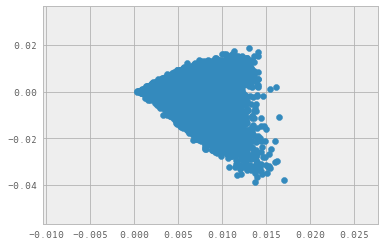

In [16]:
plt.scatter(VT[0, :], VT[1, :])